Download Dataset from RoboFlow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="m71UJcK4aIsn1MRFrfL1")
project = rf.workspace("intelligent-vision-systems").project("defect-in-contact-lens-pack")
version = project.version(11)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
retrying...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Defect-in-contact-lens-pack-11 in yolov11:: 100%|██████████| 5282/5282 [00:00<00:00, 5591.32it/s]


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 12.9 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image


In [ ]:
dataset.location

'/content/Defect-in-contact-lens-pack-11'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 164MB/s]
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Defect-in-contact-lens-pack-11/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

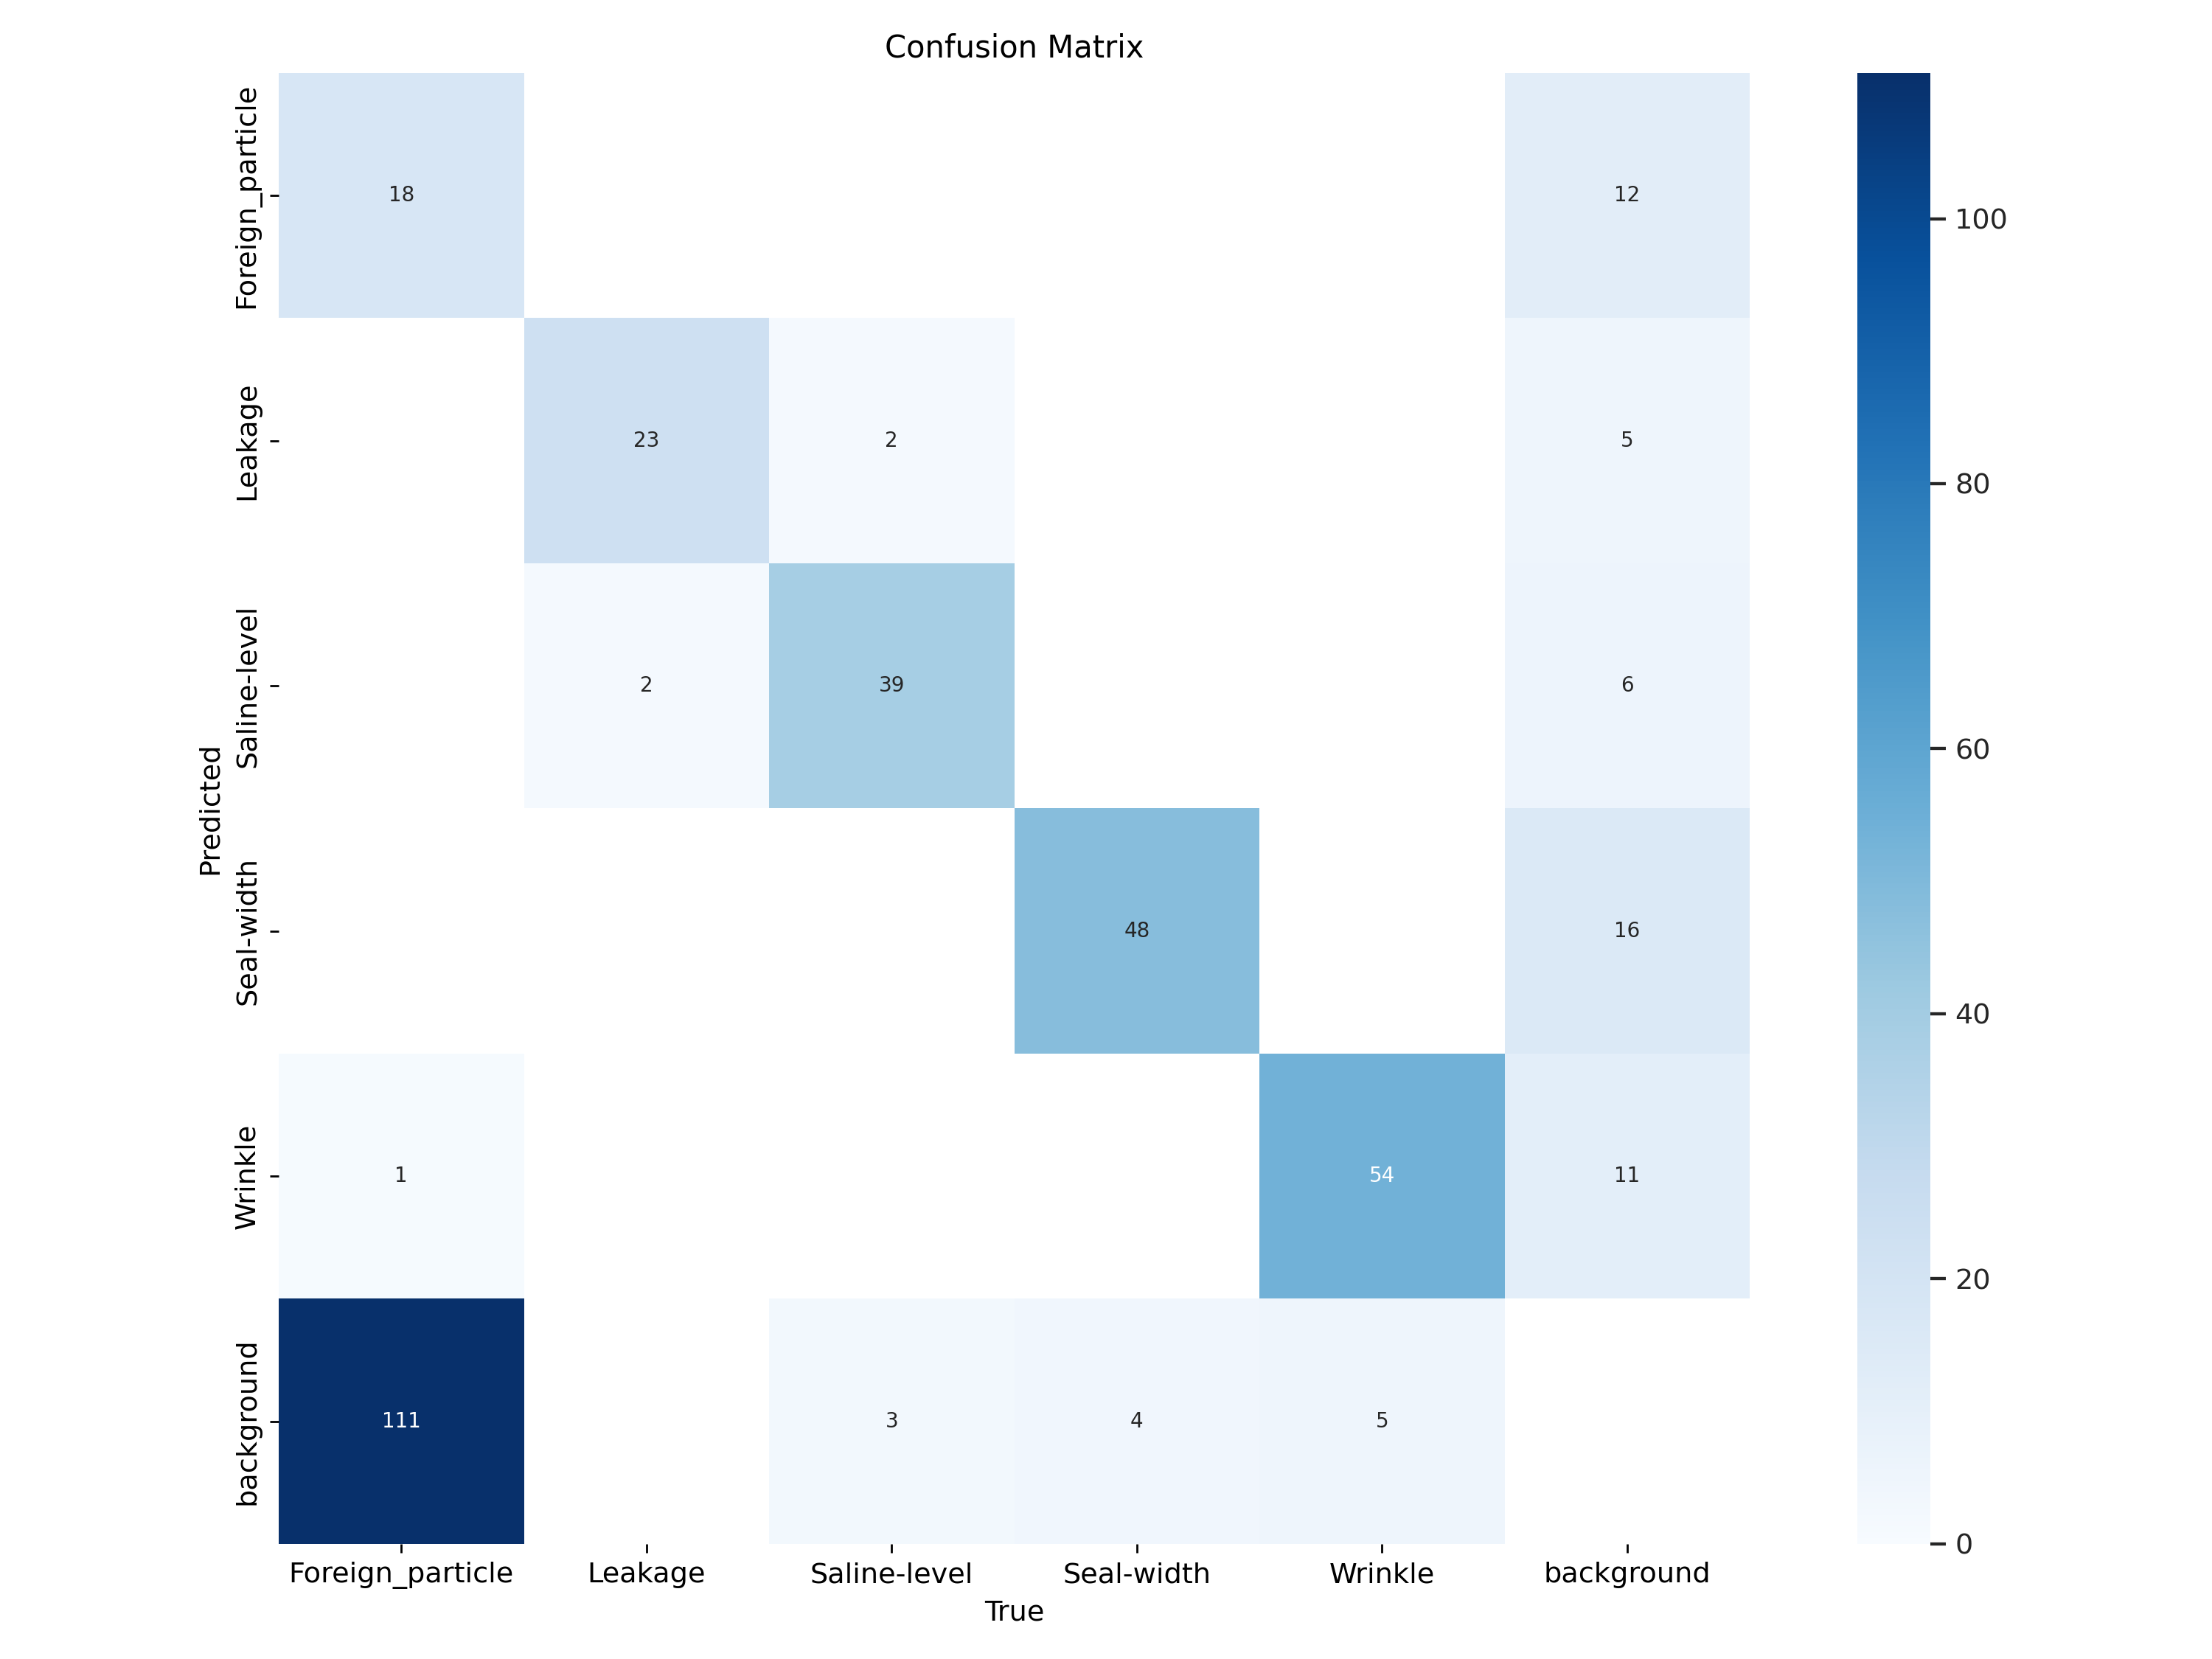

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

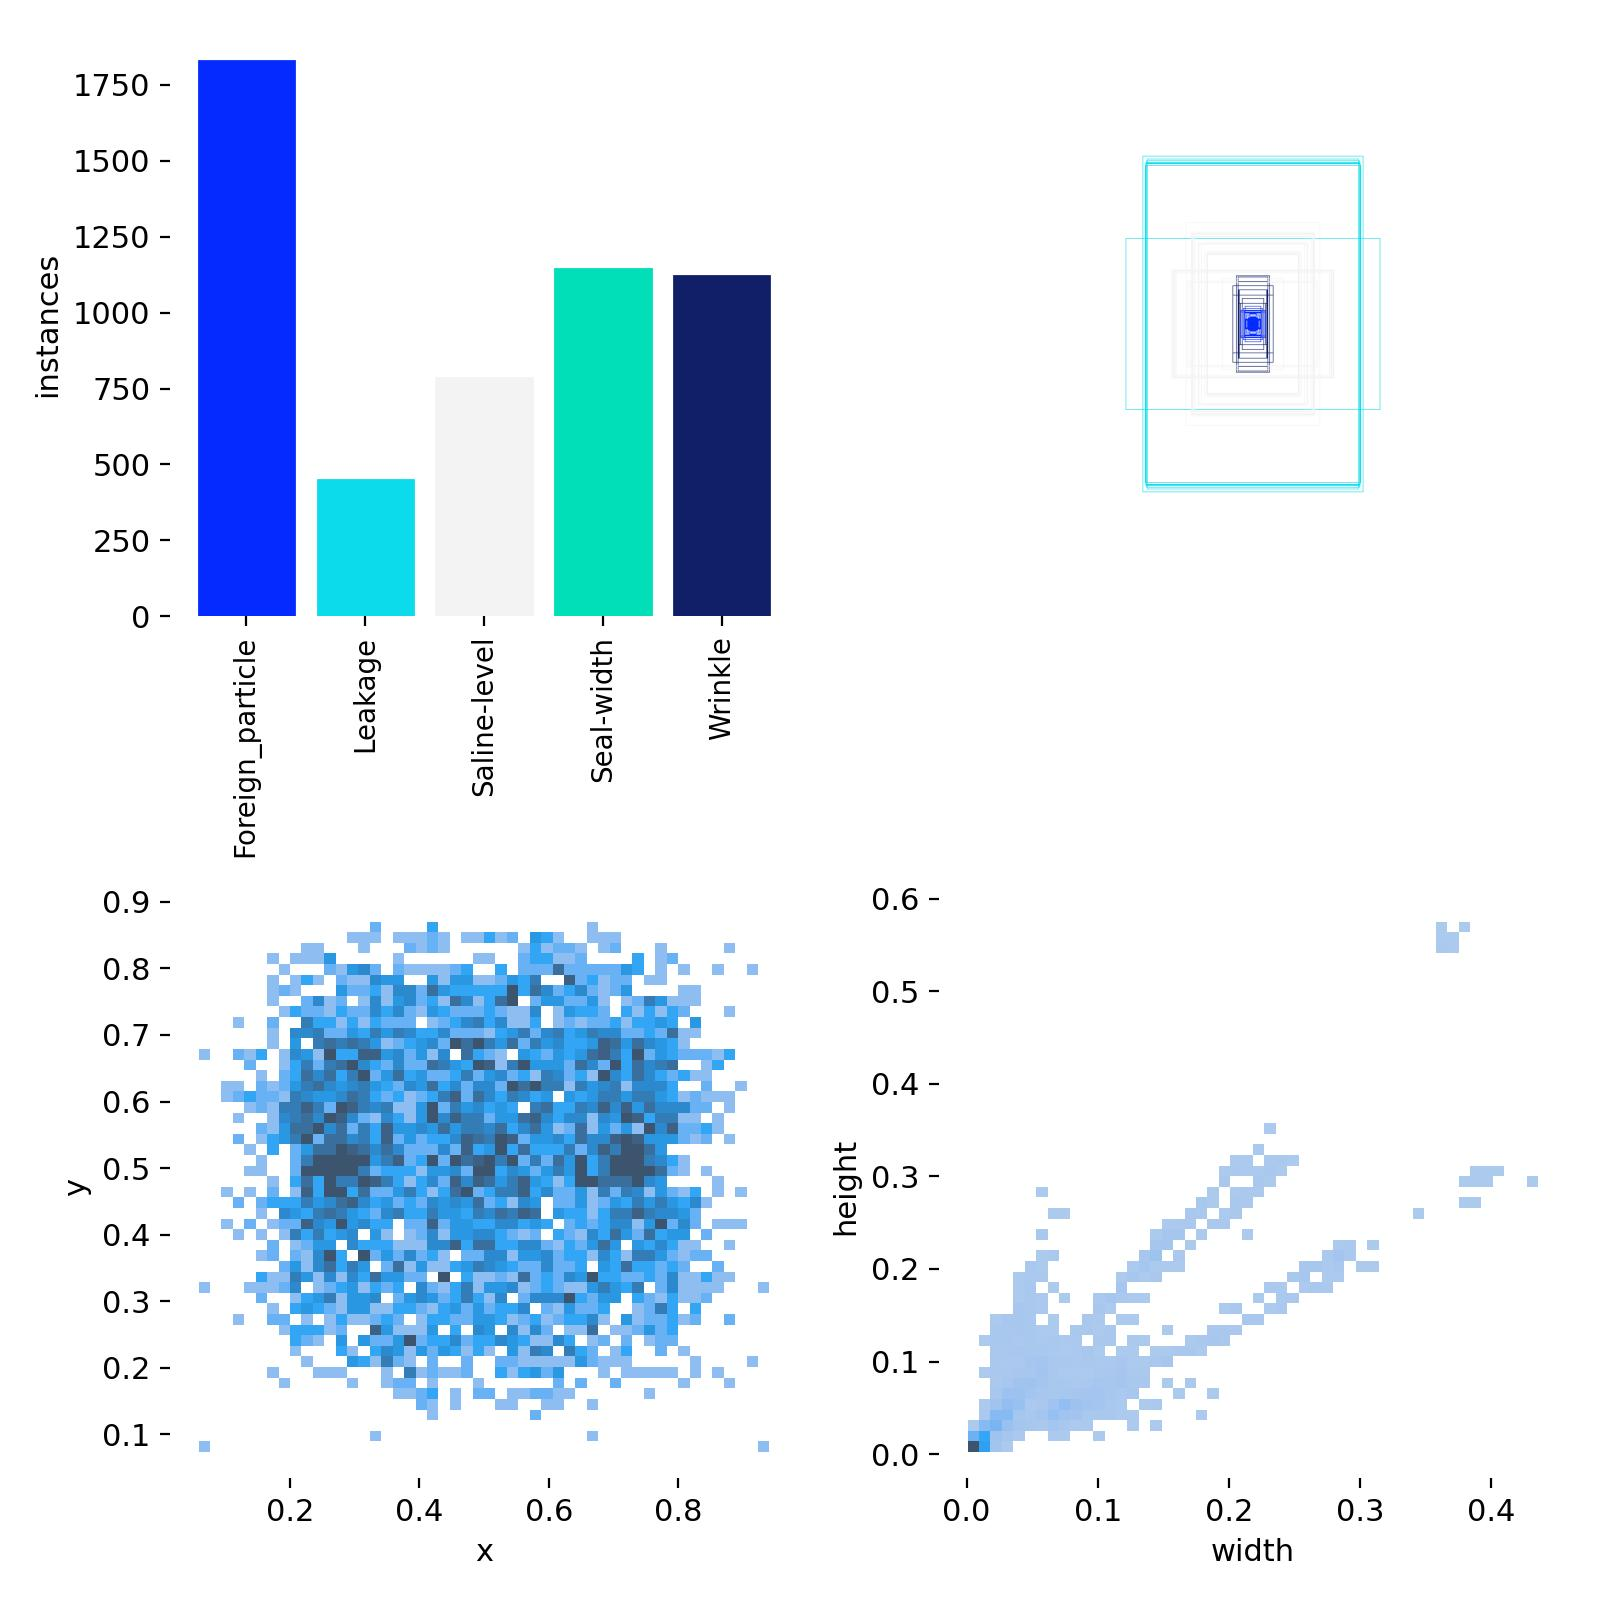

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

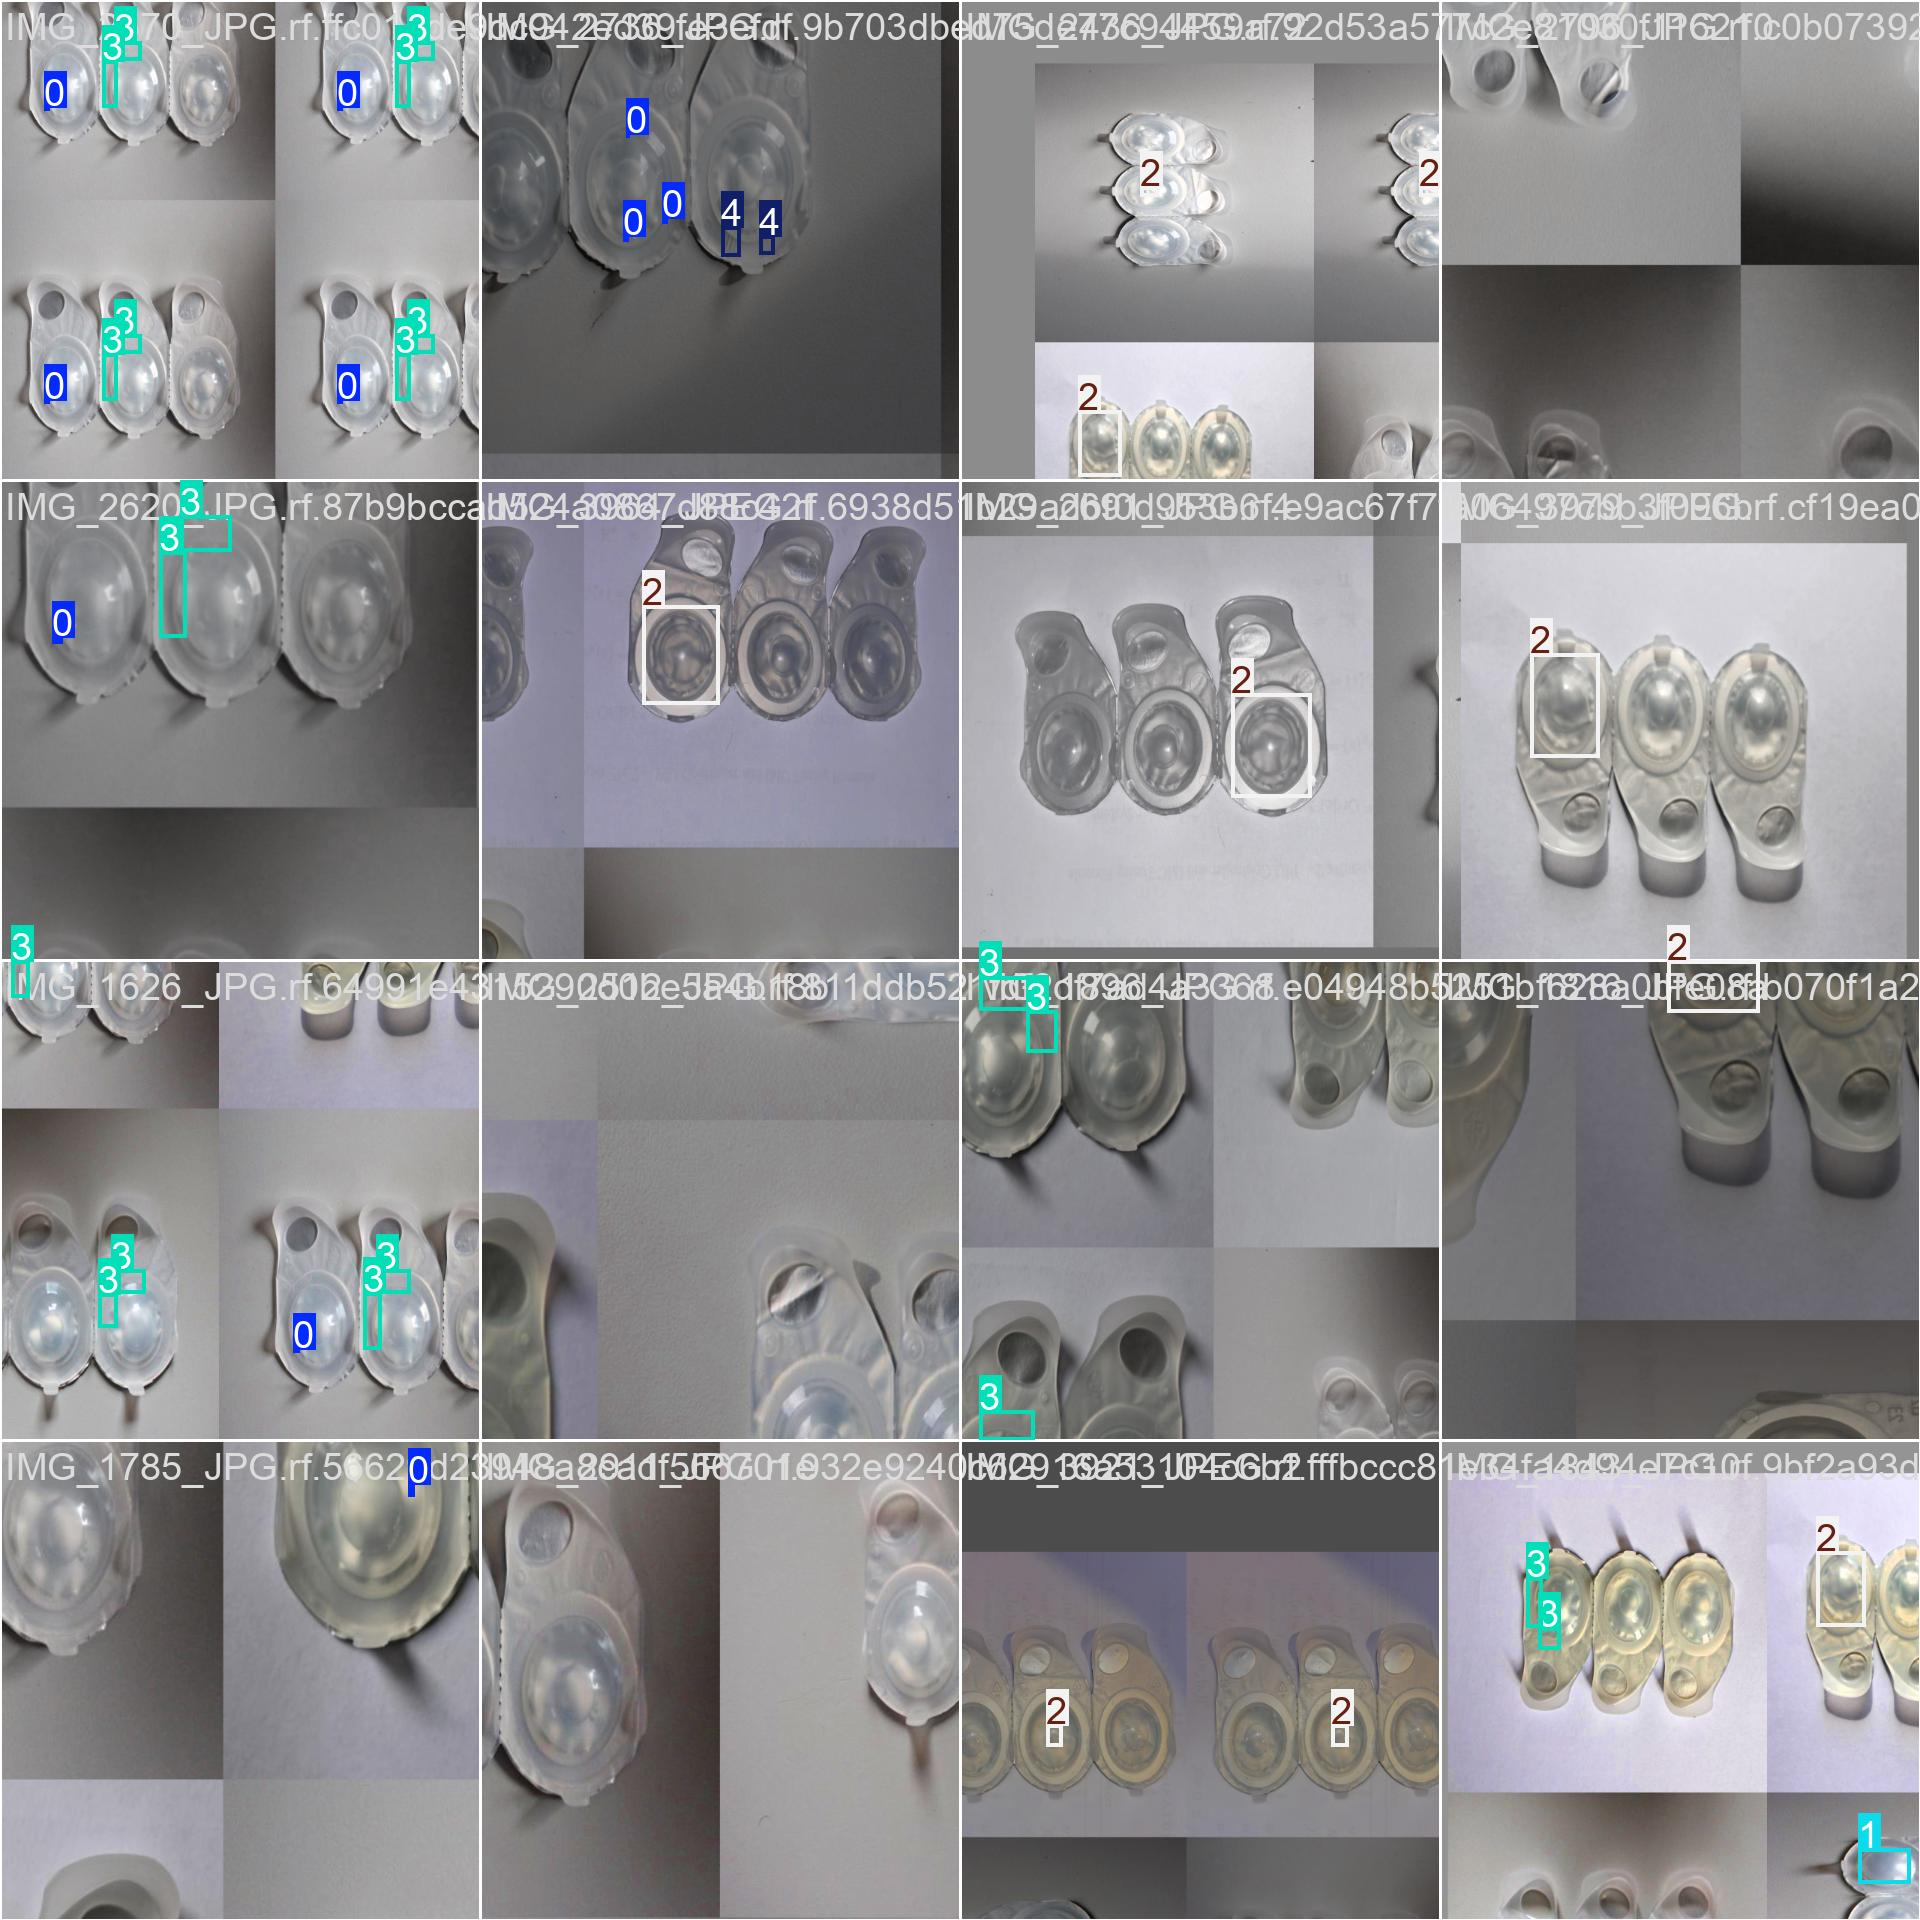

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)


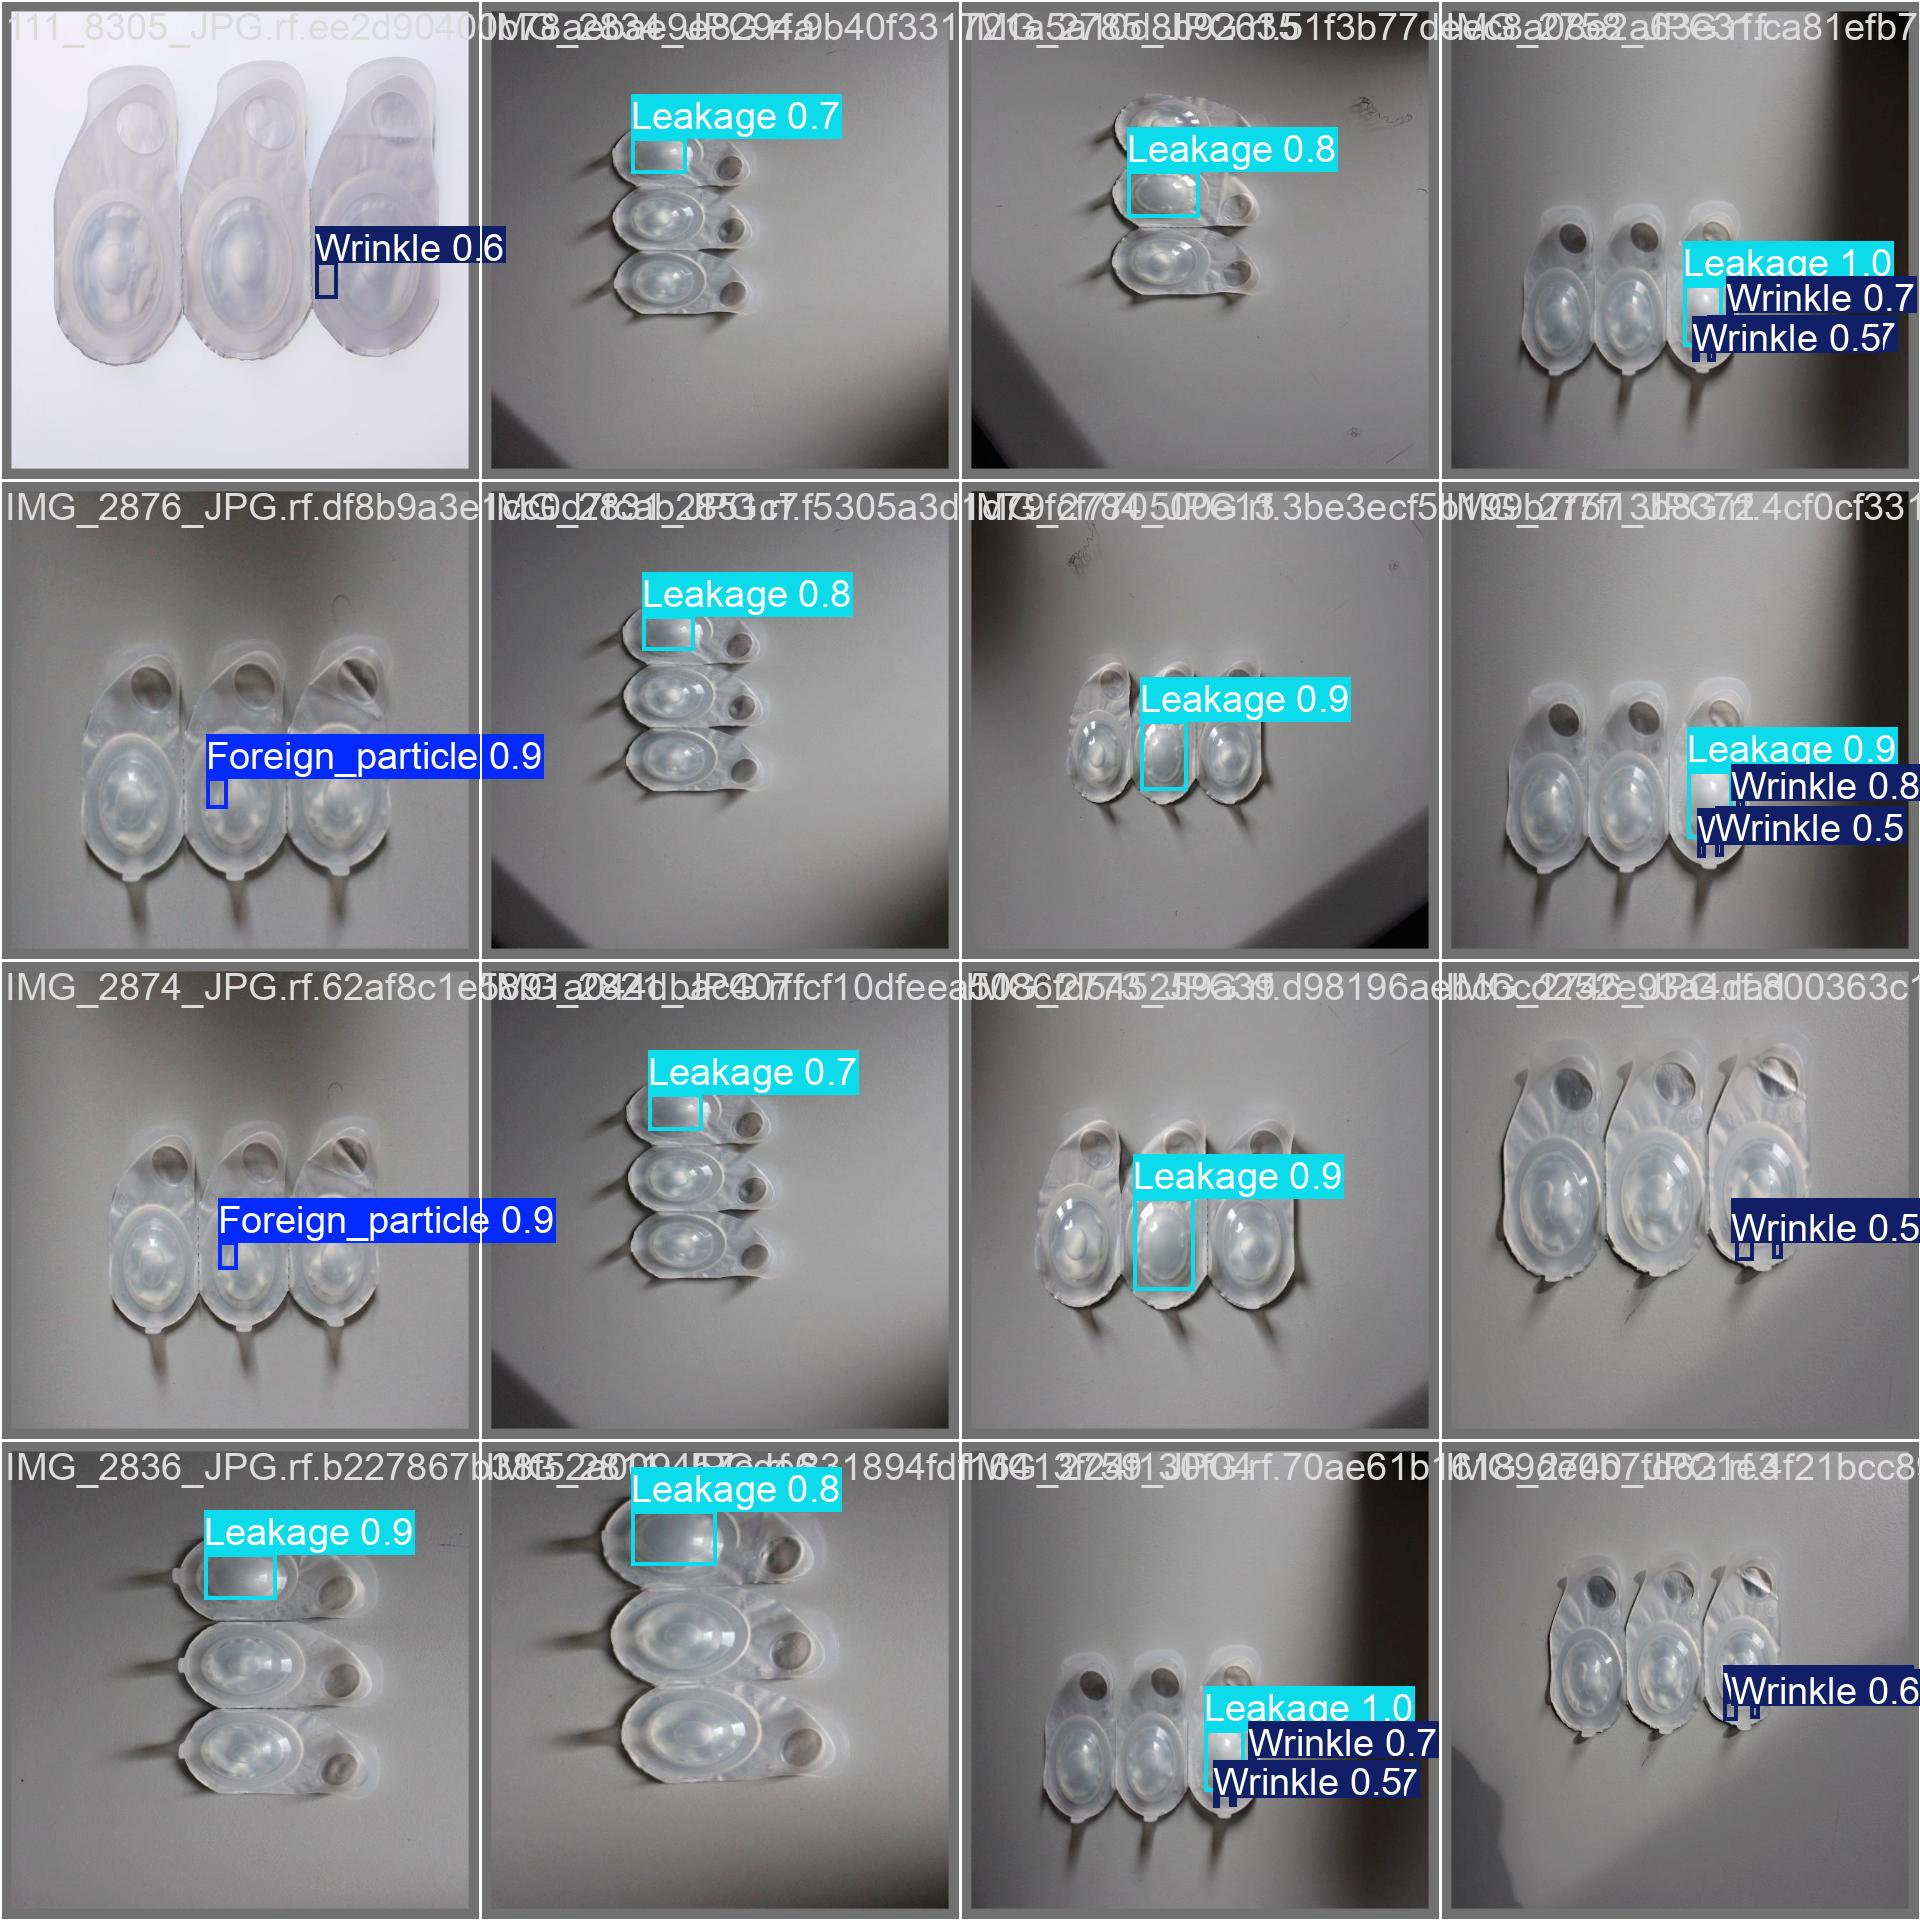

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

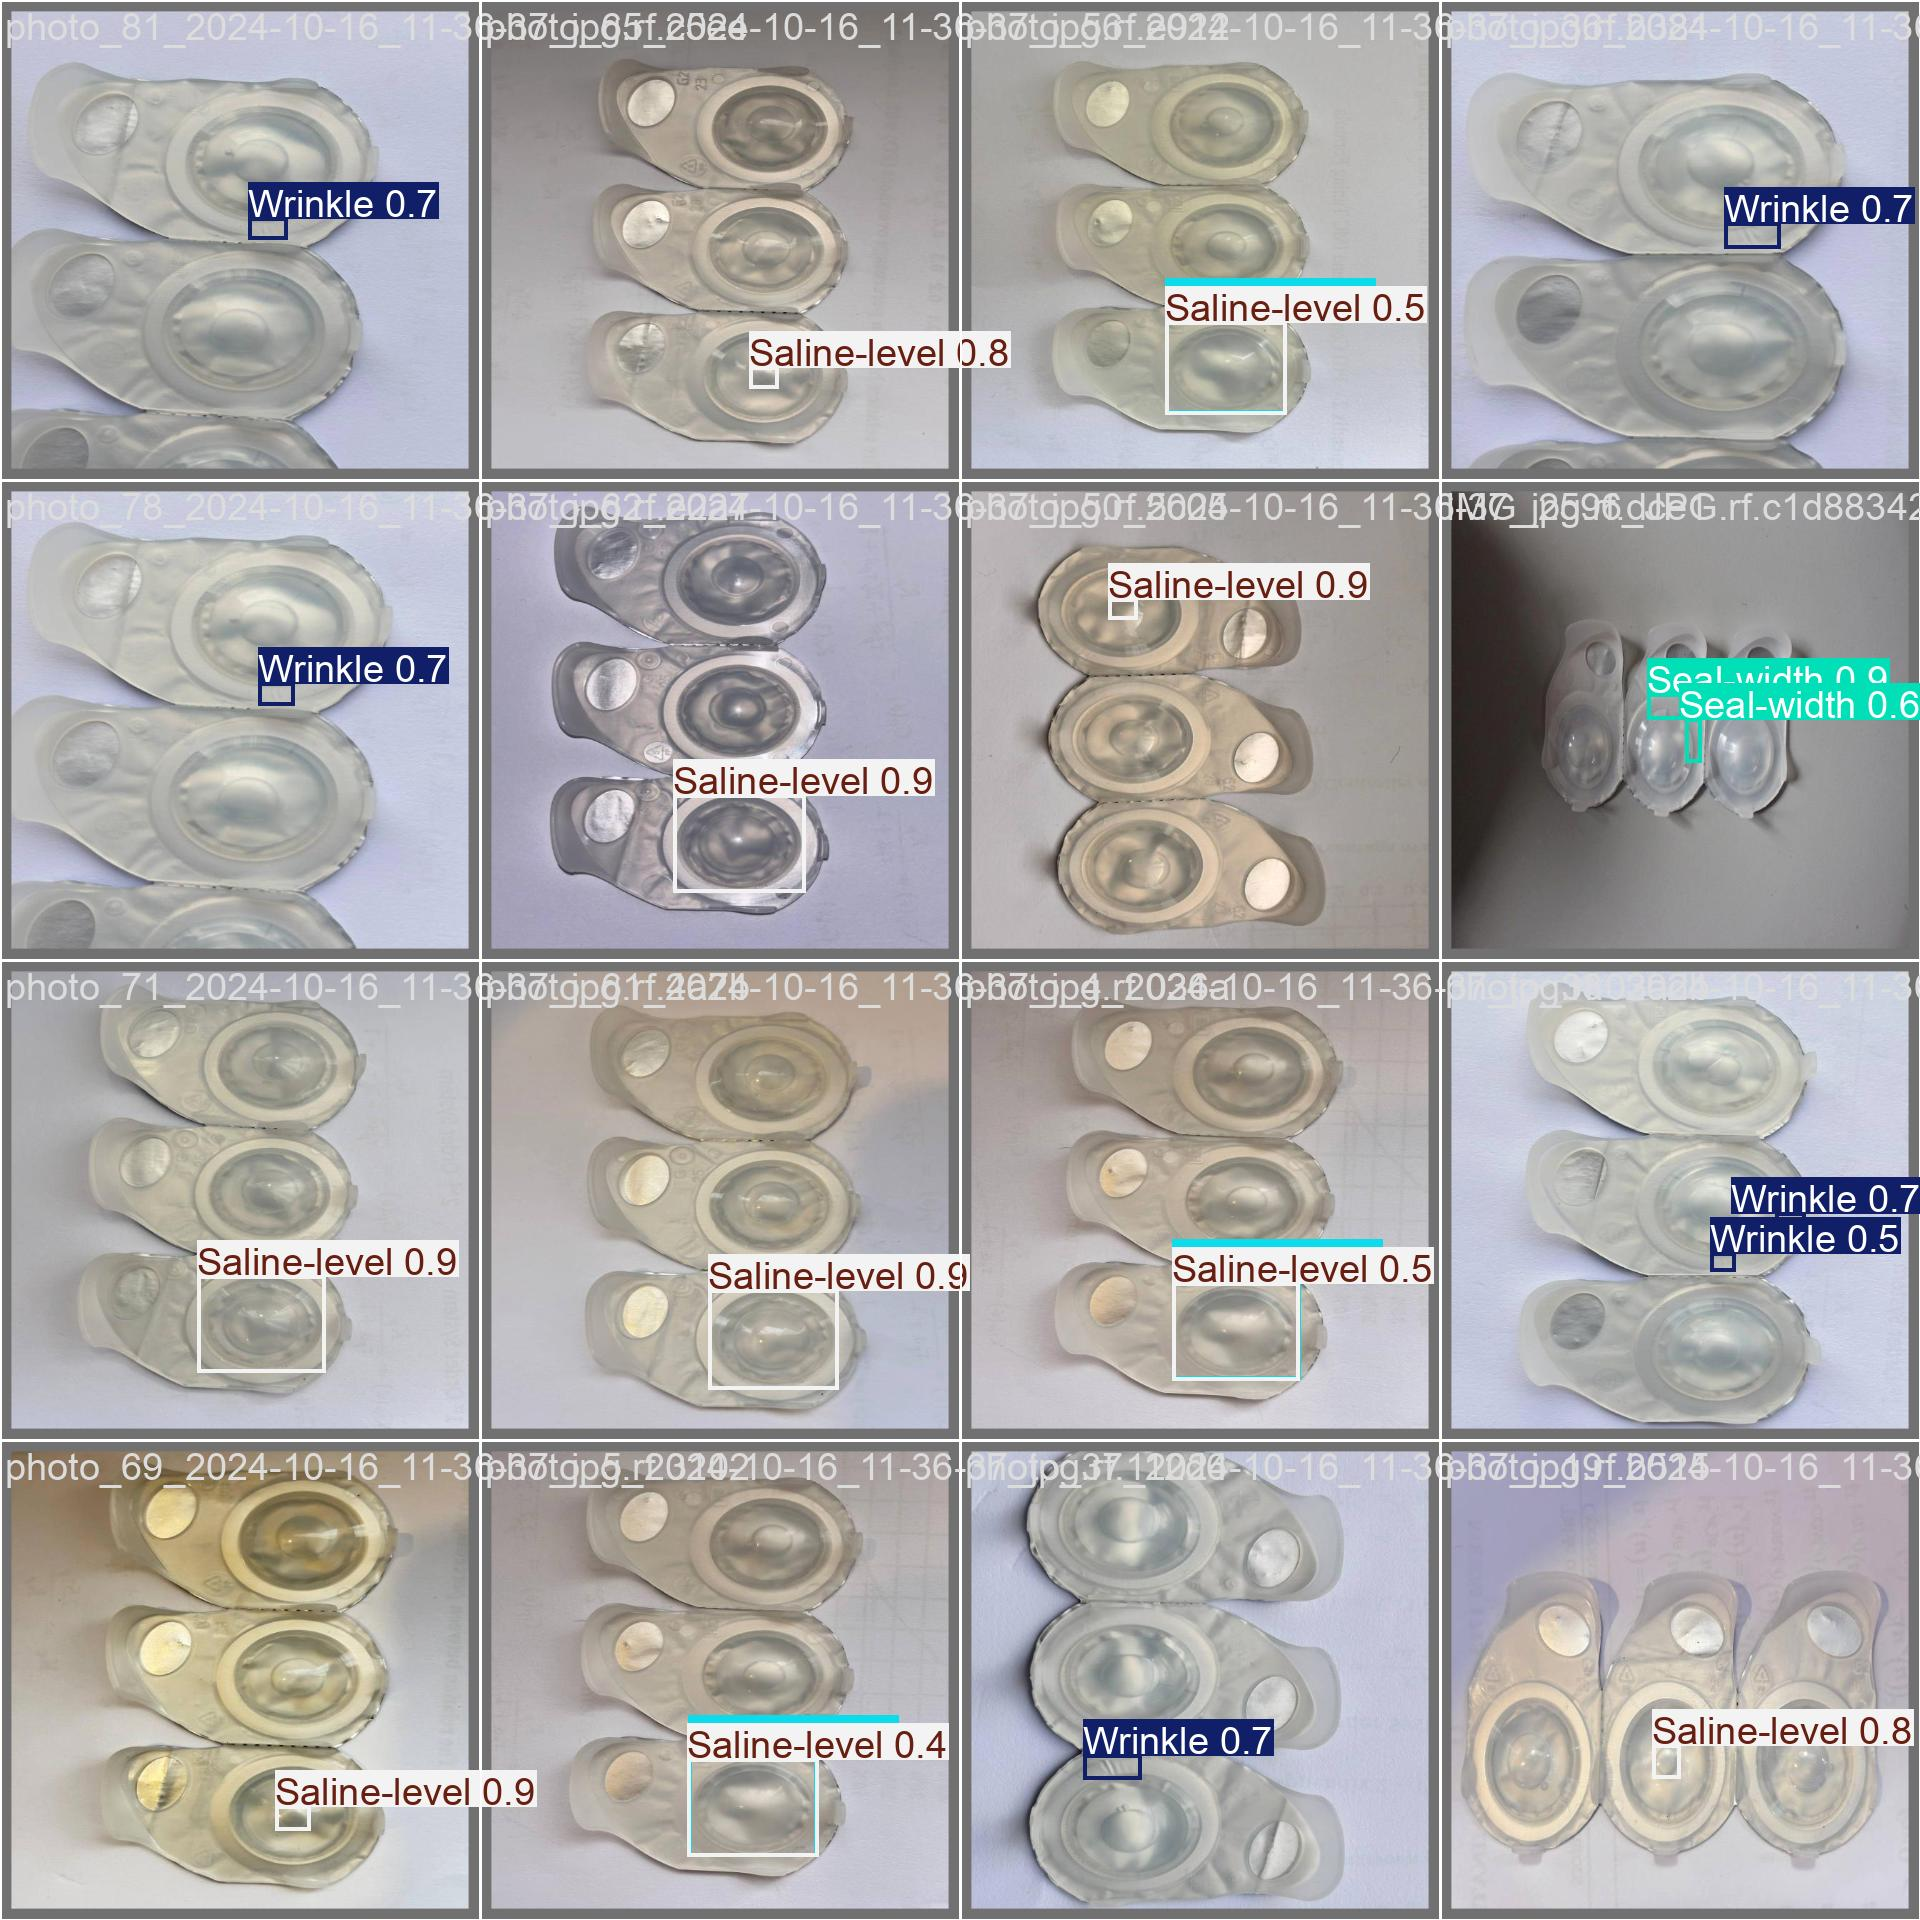

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Defect-in-contact-lens-pack-11/valid/labels.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 126/126 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:03<00:00,  2.48it/s]
                   all        126        310      0.784      0.739      0.762      0.543
      Foreign_particle         35        130       0.49     0.0889     0.0905     0.0451
               Leakage         25         25      0.839          1      0.965      0.839
          Saline-level         40         44      0.906      0.878      0.953      0.829
            Seal-width         27         52      0.894      0.865      0.948      0.566
               Wrinkle         37         59      0.791      0.864      0.855      0.435
Speed: 1.6ms preprocess, 6.8ms in

In [ ]:
#Step # 08 Inference with Custom Model on Images


!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/131 /content/Defect-in-contact-lens-pack-11/test/images/111_8317_JPG.rf.19a6e45ffe35b3d0208fc3f17a2fca39.jpg: 640x640 1 Wrinkle, 27.5ms
image 2/131 /content/Defect-in-contact-lens-pack-11/test/images/111_8323_JPG.rf.7134f91c0e723630aec541011af69ce6.jpg: 640x640 1 Wrinkle, 10.1ms
image 3/131 /content/Defect-in-contact-lens-pack-11/test/images/111_8326_JPG.rf.b0d3f578bf3071ad2a9179b7759d7c30.jpg: 640x640 1 Foreign_particle, 1 Leakage, 8.4ms
image 4/131 /content/Defect-in-contact-lens-pack-11/test/images/IMG_1619_JPG.rf.e3434f9f3a0b0bf94804ac3f1c3b5513.jpg: 640x640 1 Saline-level, 8.3ms
image 5/131 /content/Defect-in-contact-lens-pack-11/test/images/IMG_1639_JPG.rf.a1ddae7ed87077e2f57aa7b80f3aae3d.jpg: 640x640 1 Saline-level, 8.4ms
image 6/131 /content/Defect-in-contact-lens-pack-11/test/images/IMG_1644_JPG.rf.1176fba

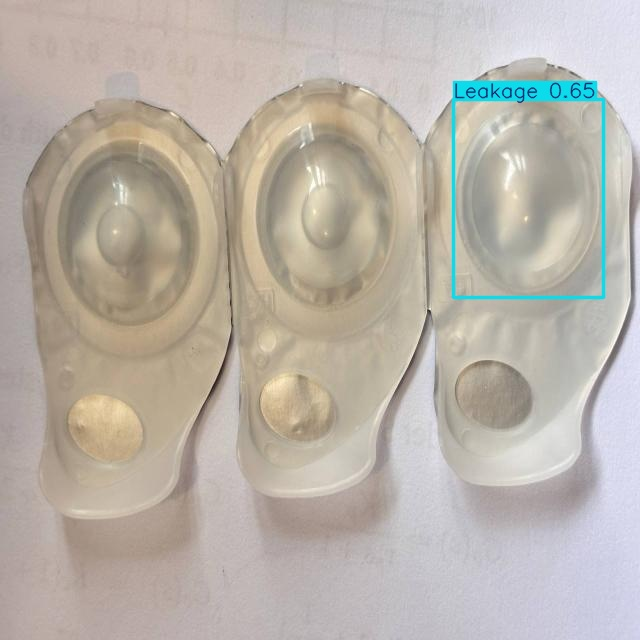

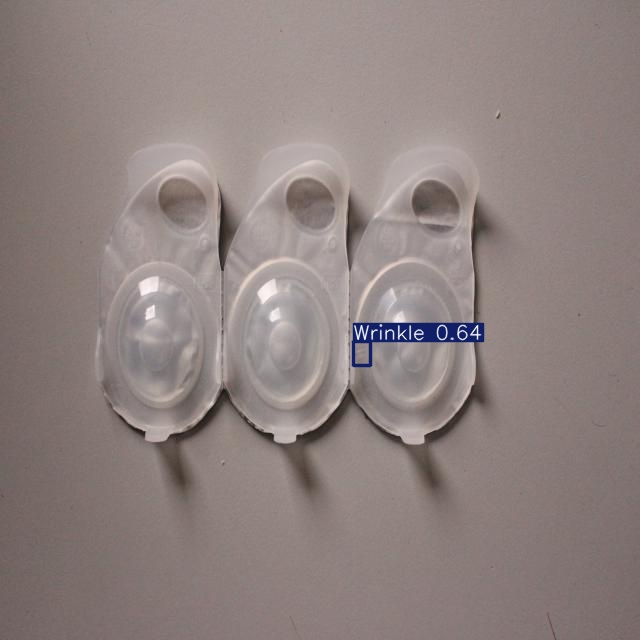

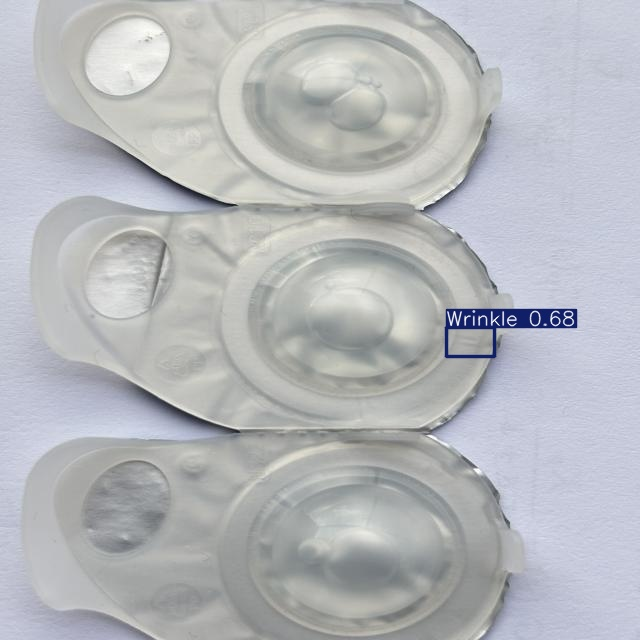

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")